In [1]:
import numpy as np
import matplotlib.pyplot as plt

INIT_POINT: [0.26264054 0.1064927 ]
[[array([0.99999853, 0.99999633]) 5.541401902011053e-11]
 [array([0.99999795, 0.99999662]) 5.574399267655876e-11]
 [array([0.99999853, 0.99999633]) 5.607602127215086e-11]
 [array([0.99999795, 0.99999663]) 5.641031381850798e-11]
 [array([0.99999854, 0.99999634]) 5.67466869347645e-11]
 [array([0.99999795, 0.99999663]) 5.7085353592441185e-11]
 [array([0.99999854, 0.99999634]) 5.742612679710142e-11]
 [array([0.99999795, 0.99999664]) 5.776922353080303e-11]
 [array([0.99999855, 0.99999635]) 5.8114453107167606e-11]]
the minimum is: 5.846203660152047e-11 at point: [0.99999796 0.99999665]


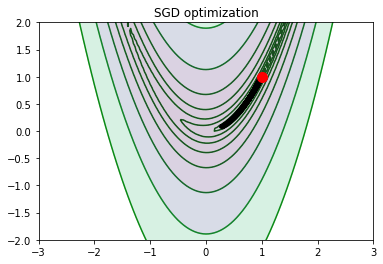

In [2]:
class SGD:
    def __init__(self, lr, epoch):
        self.lr = lr
        self.init_point = np.random.randn(2) #랜덤으로 설정 (확률적 경사하강법이므로)
        self.epoch = epoch  # 에포크수 50000으로 설정 10000부터 수렴하기 시작했음

    def train(self):       # 학습부분 코드
        lrate = self.lr

        x = self.init_point
        print("INIT_POINT: " + str(x))   # 값이 랜덤이라 확인용도

        epoch = self.epoch
        current = []

        for i in range(epoch):
            f = self.Rosenbrock(x)
         
            current.append([x,f])
            gradient = np.array(self.Rosenbrockg(x))

            x = x - np.dot(lrate,gradient)   # x = x - learning_rate * gradient; 확률적 경사 하강법 기본 원리

        current = np.array(current)

        # current 배열의 마지막 10줄만 나오도록 print
        print(current[-10:-1])
        print(f'the minimum is: {current[-1, 1]} at point: {current[-1,0]}')


    def Rosenbrock(self,x):         # 로젠브록 함수로 성능 검사   # (1-x)^2 + 100(y-x^2)^2
        return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2
  
    def Rosenbrockg(self,X):  # 편미분
        g_0 = -2 * (1 - X[0]) - 4 * 100 * (X[1] - X[0]**2) * X[0]
        g_1 = 2 * 100 * (X[1] - X[0]**2)
    
        return np.array([g_0, g_1])

    # 시각화
    def visualize(self):

        xx = np.arange(-5, 5, 0.05)
        yy = np.arange(-5, 5, 0.05)

        X, Y = np.meshgrid(xx,yy)
        Z = self.Rosenbrock(np.array([X,Y]))


        levels = np.logspace(-1,3,10)

        plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
        plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
        plt.plot(1, 1, 'ro', markersize=10)

        lrate = self.lr
        s = 0.95

        for i in range(self.epoch):
            g = self.Rosenbrockg(self.init_point)
            plt.arrow(self.init_point[0], self.init_point[1],  -s * lrate * g[0], -s * lrate * g[1],
                      head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
            
            self.init_point[0] = self.init_point[0] - lrate * g[0]
            self.init_point[1] =  self.init_point[1]- lrate * g[1]

        plt.xlim(-3, 3)
        plt.ylim(-2, 2)
        plt.title("SGD optimization")
        plt.show()


if __name__ == '__main__':
    SGD = SGD(0.002, 15000)
    SGD.train()     
    SGD.visualize()